# Avocado prices analysis and prediction

## Table of Contents
  - [1 Giới thiệu](#1-giới-thiệu)
    - [1.1 Đặt vấn đề](#1.1-đặt-vấn-đề)
    - [1.2 Định nghĩa bài toán](#1.2-định-nghĩa-bài-toán)
  - [2 Chuẩn bị dữ liệu](#2-chuẩn-bị-dữ-liệu)
    - [2.1 Mô tả bộ dữ liệu](#2.1-mô-tả-bộ-dữ-liệu)
    - [2.2 Tổng quan về bộ dữ liệu](#2.2-tổng-quan-về-bộ-dữ-liệu)
  - [3 Phân tích khám phá dữ liệu (EDA)](#3-phân-tích-khám-phá-dữ-liệu-(eda))
    - [3.1 Các đặc trưng số học](#3.1-các-đặc-trưng-số-học)
    - [3.2 Phân tích đặc trưng giá](#3.2-phân-tích-đặc-trưng-giá)
    - [3.3 Phân tích các đặc trưng khối lượng giao dịch (volume).](#3.3-phân-tích-các-đặc-trưng-khối-lượng-giao-dịch-(volume).)
      - [PLU](#plu)
      - [Type](#type)
      - [Total volume](#total-volume)
    - [3.4 Phân tích đặc trưng khu vực](#3.4-phân-tích-đặc-trưng-khu-vực)
    - [3.5 Phân tích đặc trưng doanh thu](#3.5-phân-tích-đặc-trưng-doanh-thu)
    - [3.6 Biểu đồ Choropleth maps](#3.6-biểu-đồ-choropleth-maps)
  - [4 Phân tích chuỗi thời gian](#4-phân-tích-chuỗi-thời-gian)
    - [4.3 Phân rã chuỗi thời gian](#4.3-phân-rã-chuỗi-thời-gian)
    - [4.2 Kiểm tra tính dừng](#4.2-kiểm-tra-tính-dừng)
  - [5 Huấn luyện mô hình](#5-huấn-luyện-mô-hình)
    - [5.1 ARIMA](#5.1-arima)
      - [5.1.1 Modeling](#5.1.1-modeling)
      - [5.1.2 Forecasting](#5.1.2-forecasting)
        - [In-sample](#in-sample)
        - [Out-of-sample](#out-of-sample)
    - [5.2 SARIMA](#5.2-sarima)
      - [5.2.1 Modeling](#5.2.1-modeling)
      - [5.2.2 Forecasting](#5.2.2-forecasting)
        - [In-sample](#in-sample)
        - [Out-of-sample](#out-of-sample)

## 1 Giới thiệu

### 1.1 Đặt vấn đề
Trong bối cảnh kinh tế hiện đại, việc phân tích và dự đoán giá cả hàng hóa, đặc biệt là các sản phẩm nông nghiệp, đóng vai trò quan trọng trong việc hỗ trợ ra quyết định của các bên liên quan, từ nhà sản xuất, nhà bán lẻ đến người tiêu dùng. Giá cả nông sản không chỉ phản ánh mối quan hệ giữa cung và cầu mà còn chịu ảnh hưởng của nhiều yếu tố phức tạp như mùa vụ, điều kiện thời tiết, chi phí vận chuyển, và xu hướng tiêu dùng.

Trong các sản phẩm nông nghiệp, những mặt hàng có tính thời vụ cao và nhu cầu tiêu thụ lớn thường có giá biến động mạnh. Điều này tạo ra thách thức lớn cho các nhà hoạch định chính sách và doanh nghiệp trong việc lập kế hoạch sản xuất, phân phối và kinh doanh. Một giải pháp quan trọng là áp dụng các kỹ thuật phân tích dữ liệu và dự đoán giá cả dựa trên dữ liệu lịch sử, qua đó nhận diện các xu hướng tiềm ẩn và dự báo các biến động trong tương lai.

Bài toán dự đoán giá cả không chỉ dừng lại ở việc đưa ra các con số chính xác mà còn giúp phát hiện các yếu tố chính ảnh hưởng đến giá, đồng thời xác định các giai đoạn hoặc khu vực có khả năng xảy ra biến động giá bất thường. Từ đó, các chiến lược như tối ưu hóa chuỗi cung ứng, điều chỉnh sản lượng, và định giá hợp lý có thể được triển khai để nâng cao hiệu quả hoạt động.

Câu hỏi đặt ra là: Liệu chúng ta có thể sử dụng dữ liệu lịch sử để phân tích và dự đoán chính xác giá cả của một sản phẩm nông nghiệp theo thời gian không? Đây chính là bài toán nhận diện mẫu và dự báo, có ý nghĩa thực tiễn cao không chỉ trong nông nghiệp mà còn trong các lĩnh vực khác như thương mại, vận tải, và thị trường tài chính.

### 1.2 Định nghĩa bài toán
Bài toán được đặt ra là dự đoán giá của một sản phẩm theo thời gian dựa trên các yếu tố ảnh hưởng. Trong nhiều lĩnh vực, từ nông nghiệp, công nghiệp cho đến tài chính, giá cả sản phẩm thường xuyên biến động do ảnh hưởng của nhiều yếu tố như:

- Thời gian: Các xu hướng dài hạn hoặc các biến động ngắn hạn theo mùa vụ.

- Cung và cầu: Sự thay đổi trong sản lượng hoặc nhu cầu tiêu thụ.

- Đặc tính sản phẩm: Loại sản phẩm, chất lượng, và các yếu tố khác liên quan trực tiếp đến giá trị của sản phẩm.

- Yếu tố địa lý: Khu vực phân phối, chi phí vận chuyển hoặc sự khác biệt về thị trường tiêu dùng.

Bài toán có thể được mô tả cụ thể như sau:

- Đầu vào: Dữ liệu lịch sử bao gồm các thông tin: thời gian, sản lượng, loại sản phẩm, và các yếu tố khác có ảnh hưởng đến giá.

- Đầu ra: Dự đoán giá sản phẩm tại một thời điểm cụ thể trong tương lai.

Mục tiêu của bài toán là xây dựng một mô hình dự đoán chính xác giá sản phẩm Xây dựng một mô hình dự đoán chính xác giá sản phẩm dựa trên các thông tin đầu vào.
Hiểu rõ các yếu tố chính ảnh hưởng đến giá để hỗ trợ các chiến lược quản lý, tối ưu hóa sản xuất, hoặc định giá phù hợp.

## 2 Chuẩn bị dữ liệu

### 2.1 Mô tả bộ dữ liệu
Bộ dữ liệu Avocado Prices cung cấp thông tin về giá cả, sản lượng và các yếu tố liên quan đến quả bơ (avocado) tại nhiều khu vực khác nhau ở Mỹ trong khoảng thời gian từ năm 2015 đến 2018. 

Bộ dữ liệu có 18249 và 13 cột, thể hiện lịch sử của giá bơ, với các đặc trưng sau:

- Date (Ngày): Ngày thu thập dữ liệu (kiểu dữ liệu: datetime).

- AveragePrice (Giá trung bình): Giá trung bình của một quả bơ (đơn vị: USD).

- Total Volume (Tổng sản lượng): Số lượng quả bơ được bán ra trên toàn thị trường (đơn vị: số lượng quả).

- Type (Loại bơ): Phân loại sản phẩm Conventional (bơ thường) hoặc Organic (bơ hữu cơ).

- Region (Khu vực): Tên khu vực thu thập dữ liệu (ví dụ: California, New York).

- Year (Năm): Năm dữ liệu được thu thập.

- 4046, 4225, 4770 (Sản lượng dựa theo mã PLU): Số lượng bơ được bán dựa trên ba mã sản phẩm khác nhau tương ứng với kích thước (PLU4046, PLU4225, PLU4770).

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.tsa.api as smt
warnings.filterwarnings('ignore')

In [125]:
df = pd.read_csv('data/avocado.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### 2.2 Tổng quan về bộ dữ liệu

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Kết quả cho thấy bộ dữ liệu không có giá trị null. Các đặc trưng: Date, AveragePrice, Total, Volume, 4046, 4225, 4770, Total, Bags, Small, Bags, Large, Bags, XLarge, Bags, year thuộc kiểu dữ liệu số; còn các đặc trưng: type, region thuộc kiểu dữ liệu danh mục.

Ta thực hiện gom nhóm các cột để tiện cho việc xử lý dữ liệu:

In [127]:
numeric_columns = ['AveragePrice', 'Total Volume', '4046', '4225',
                   '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['type', 'region']

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


## 3 Phân tích khám phá dữ liệu (EDA)

### 3.1 Các đặc trưng số học

Quan sát phân phối của thuộc tính AveragePrice (biểu đồ này không biểu diễn giá trị theo thời gian mà chỉ hiển thị tần suất của giá trị) ta thấy rằng thuộc tính này có phân phối gần chuẩn, hầu hết giá trị của AveragePrice tập trung trong khoảng từ 1.0 đến 2.0.

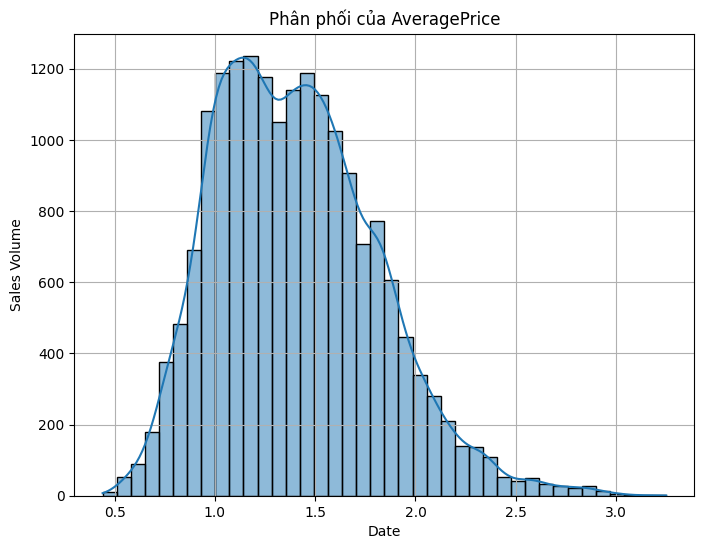

In [129]:
plt.figure(figsize=(8, 6)) 
sns.histplot(df['AveragePrice'], kde=True, bins=40) 
plt.title('Phân phối của AveragePrice') 
plt.xlabel('Date') 
plt.ylabel('Sales Volume') 
plt.grid() 
plt.show()

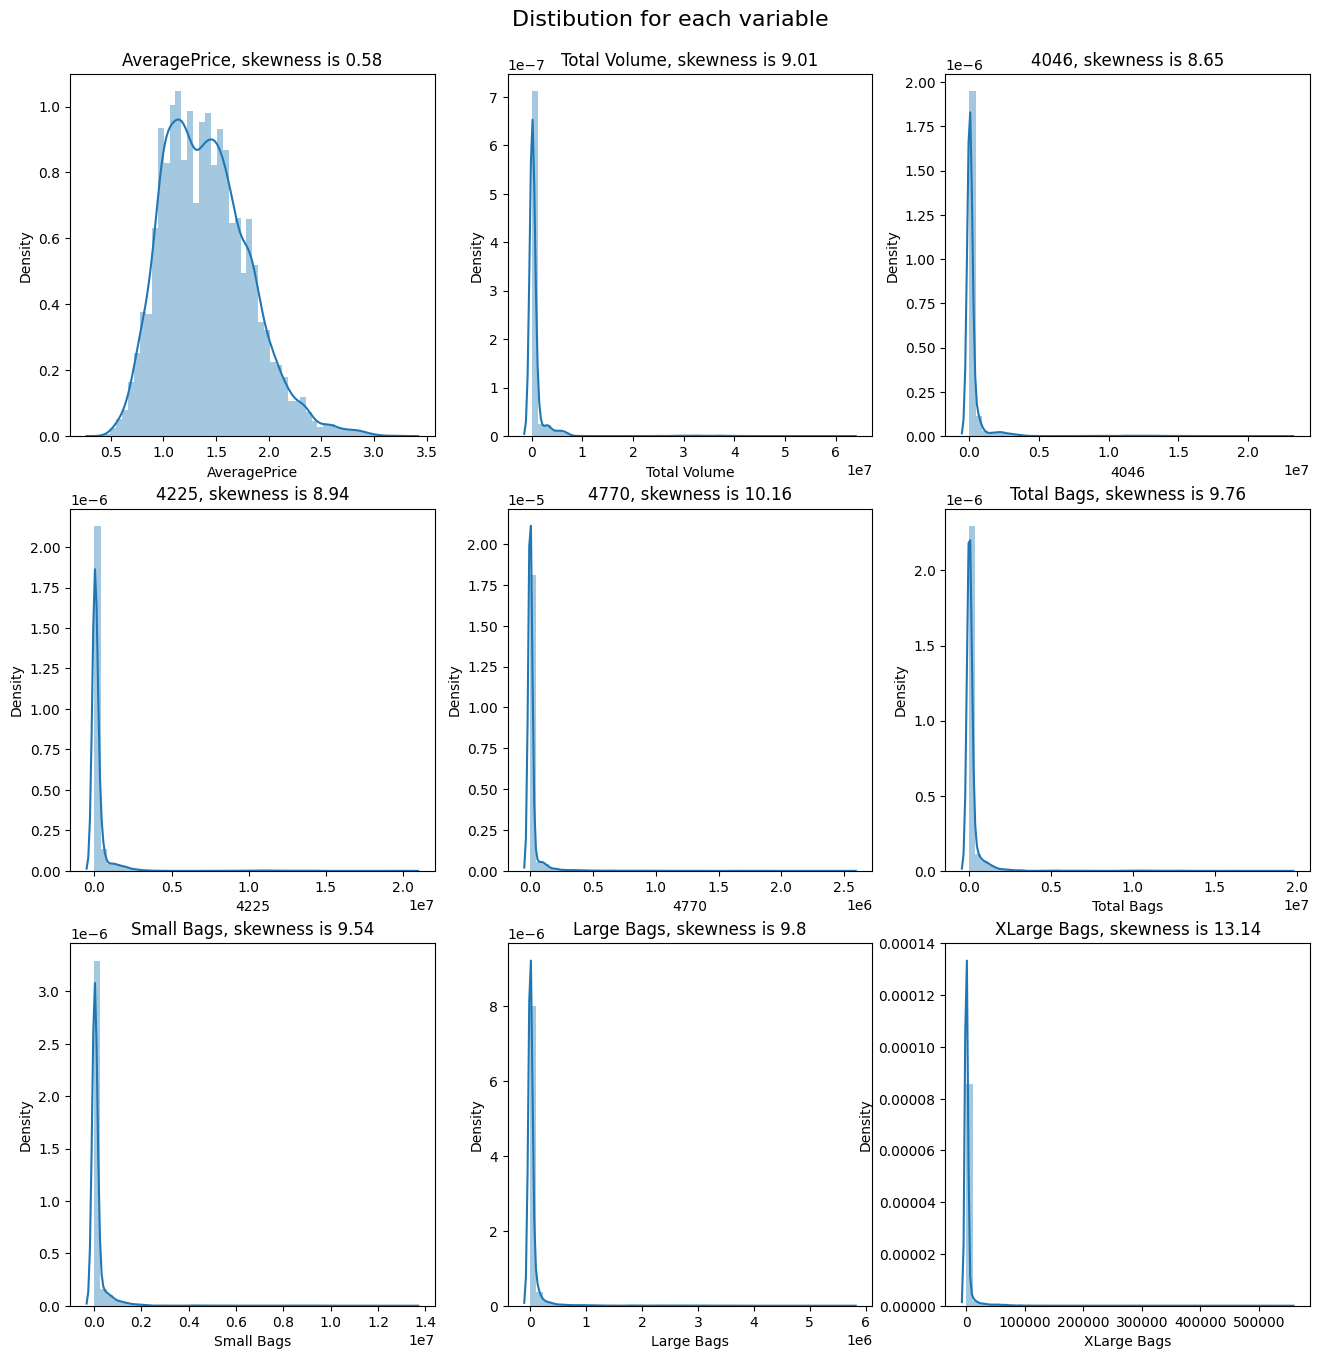

In [130]:
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
fig.suptitle('Distibution for each variable', y=0.92, size=16)
axs = axs.flatten()
for i, data in enumerate(numeric_columns):
    sns.distplot(df[data], ax=axs[i])
    axs[i].set_title(data + ', skewness is ' +
                     str(round(df[data].skew(axis=0, skipna=True), 2)))

Phân phối của từng thuộc tính số học của dữ liệu, ngoài AveragePrice ra các thuộc tính còn lại có xu hướng lệch trái rất mạnh (positive skewness). 

Hầu hết các thuộc tính đều có skewness lớn (>8), đặc biệt là các thuộc tính liên quan đến sản lượng (volume). Điều này cho thấy cần xử lý các giá trị ngoại lai (outliers), áp
dụng biến đổi log hoặc chuẩn hoá dữ liệu để giúp giảm độ lệch. AveragePrice là biến mục tiêu và có phân phối tốt nhất.

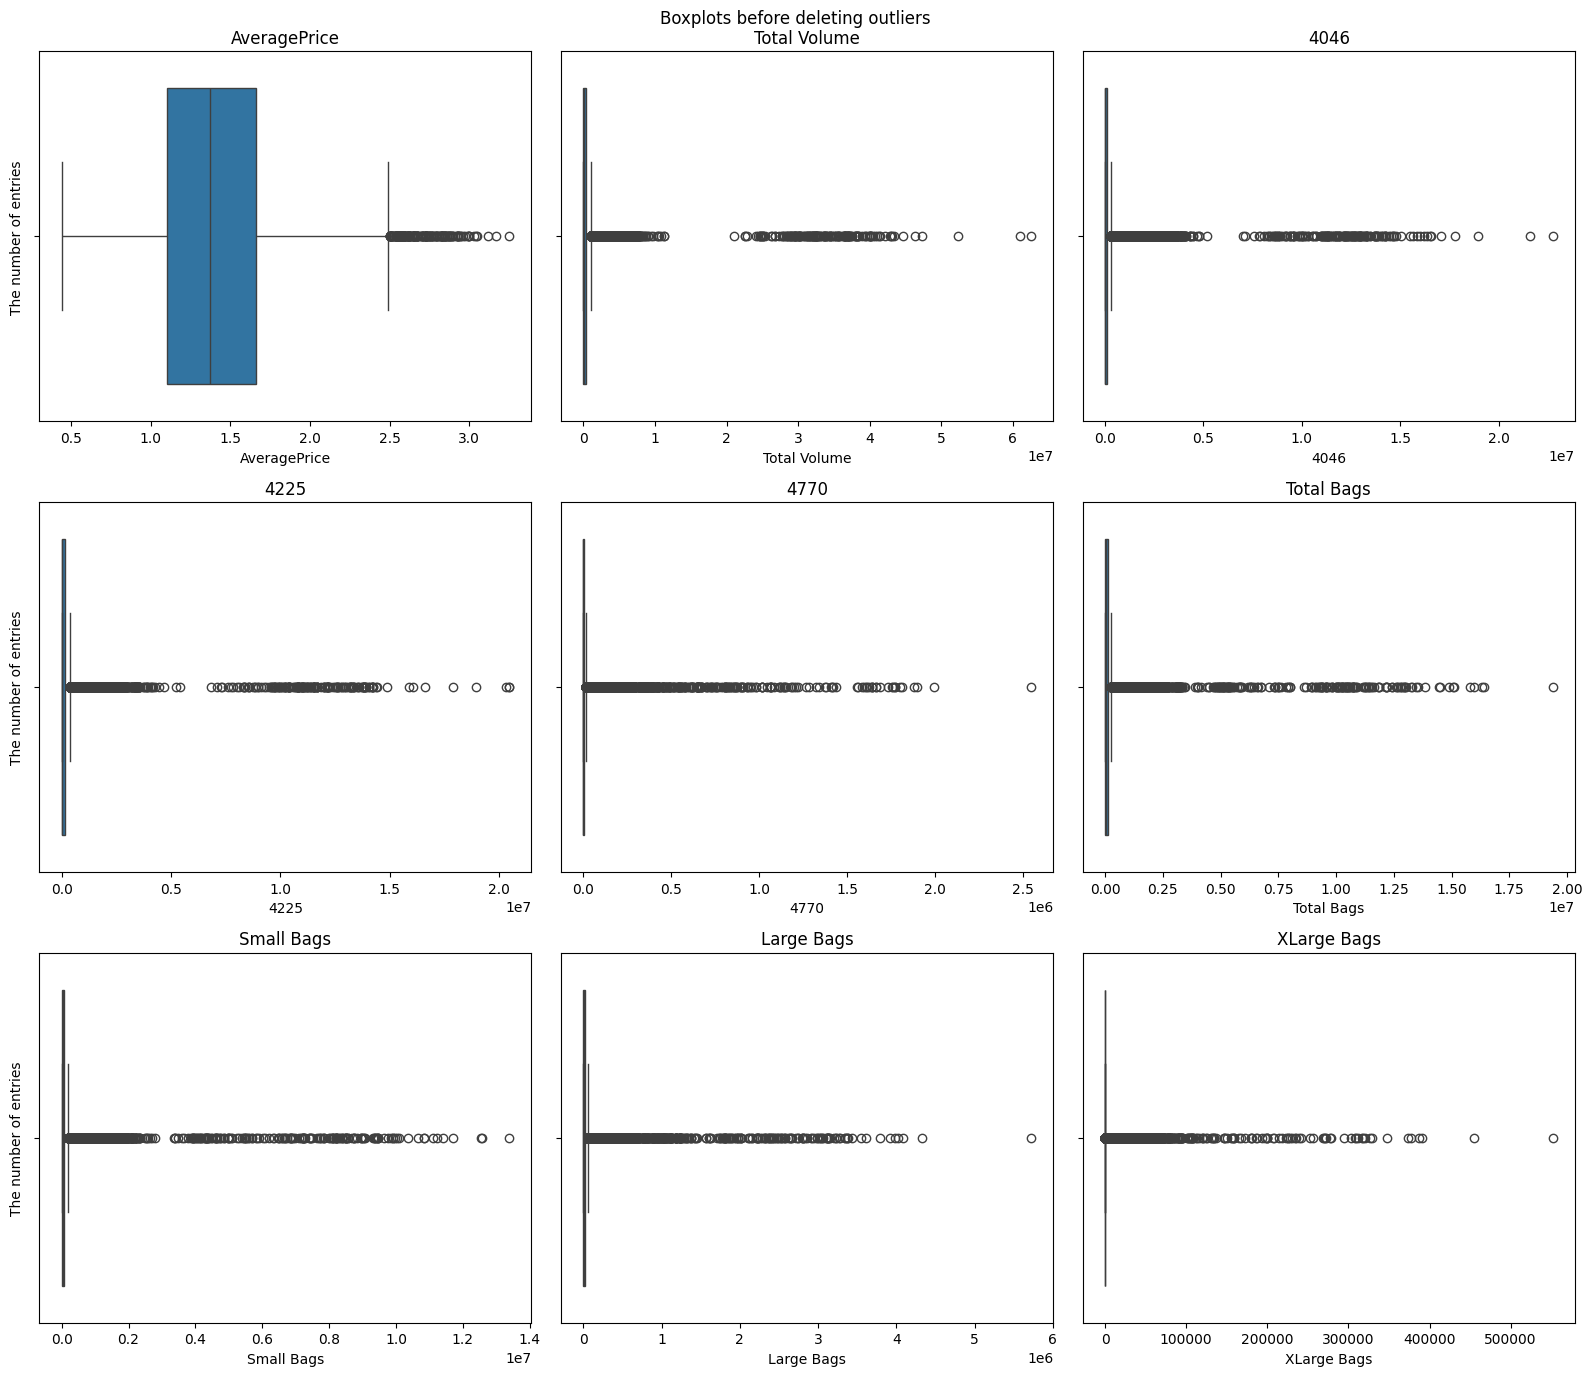

In [131]:
rows=3
cols=3
fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,14))
fig.suptitle('Boxplots before deleting outliers')
axs = axs.flatten()
for i, data in enumerate(numeric_columns):
    if i % 3 == 0:
        axs[i].set_ylabel('The number of entries')
    sns.boxplot( data=df[data], orient='h', ax=axs[i])
    axs[i].set_title(data)
plt.tight_layout()        

Ta thấy rằng giống như đã phân tích ở phân phối của dữ liệu, các đặc trưng có ngoại lệ rất lớn.

### 3.2 Phân tích đặc trưng giá

Trước khi xử lý dữ liệu ta sẽ tiến hành đặt chỉ mục của DataFrame thành cột Date. Khi một DataFrame có cột datetime làm chỉ mục, chúng ta có thể dễ dàng biểu thị dữ liệu trên biểu đồ với hàm plot() của pandas.

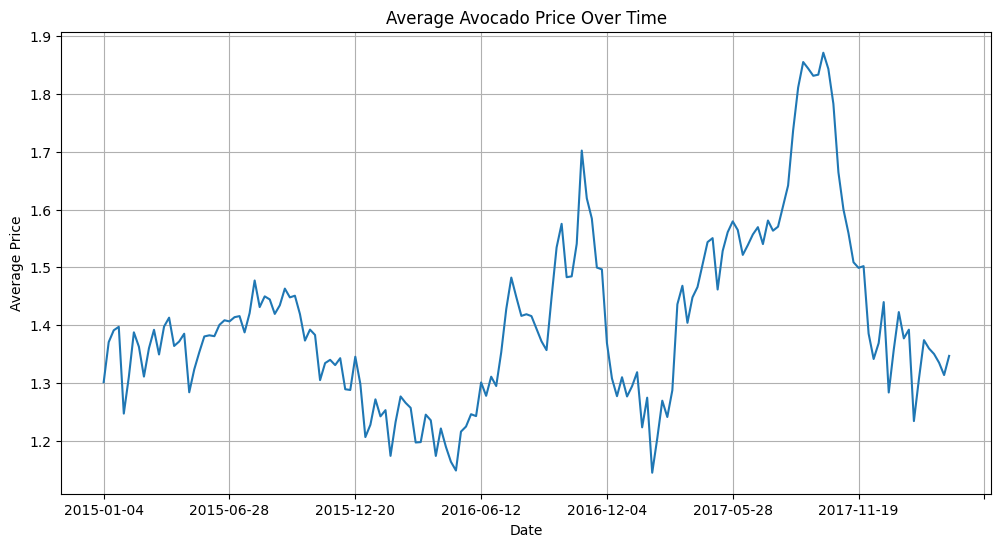

In [132]:
avg_price = df.groupby('Date')['AveragePrice'].mean().reset_index()
avg_price.set_index('Date',inplace = True)
plt.figure(figsize=(12,6))
avg_price['AveragePrice'].plot()
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid()
plt.show()

Ta thấy xu hướng chung là từ năm 2015 đến cuối năm 2017, giá bơ có xu hướng dao động với sự gia tăng đáng kể vào năm 2017. Đỉnh giá cao nhất rơi vào khoảng giữa năm 2017, đạt gần 1.9 USD, sau đó giảm mạnh.

Biểu đồ cho thấy có thể tồn tại yếu tố mùa vụ (Seasonality) trong dữ liệu chuỗi thời gian, đặc biệt là sự tăng giá vào giữa năm và giảm vào cuối năm. Điều này có thể liên quan đến nguồn cung hoặc nhu cầu tăng cao trong các thời điểm nhất định (như mùa hè hoặc lễ hội), vì vậy các điểm giá tăng hoặc giảm đột ngột này có thể là ngoại lệ cần được xem xét trong mô hình dự đoán.

Dựa vào thuộc tính Type, ta thấy rằng dữ liệu được thu thập từ giá của hai loại bơ, đó là Conventional và Organic (tức là bơ thông thường và bơ hữu cơ). Ta cần quan sát biến động giá theo từng loại bơ:

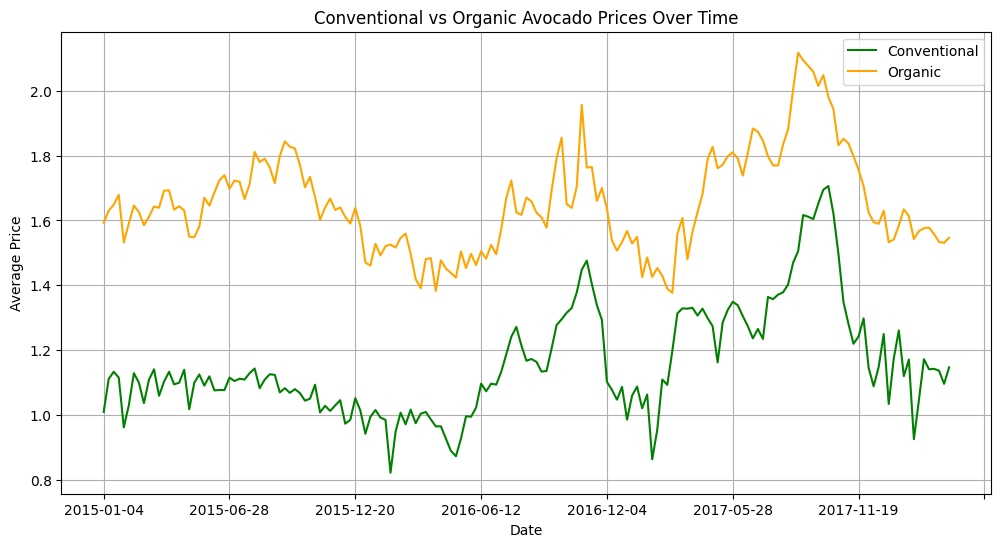

In [133]:
conv_price = df[df['type'] == 'conventional'].groupby('Date')['AveragePrice'].mean().reset_index()
conv_price.set_index('Date',inplace = True)
org_price = df[df['type'] == 'organic'].groupby('Date')['AveragePrice'].mean().reset_index()
org_price.set_index('Date',inplace = True)

# Plot price trends for conventional and organic avocados
plt.figure(figsize=(12, 6))
conv_price['AveragePrice'].plot(label='Conventional', color='green')
org_price['AveragePrice'].plot(label='Organic', color='orange')
plt.title('Conventional vs Organic Avocado Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.show()

Ta thấy rằng xu hướng biến động giá và tính mùa vụ của cả hai loại bơ là như nhau. Ta thấy rằng giá trung bình của bơ thường (conventional) thấp hơn so với bơ hữu cơ (Organic), với giá bơ thường dao động trong khoảng 0.8 đến 1.6 còn bơ hữu cơ dao động trong khoảng 1.4 đến 2.0.

### 3.3 Phân tích các đặc trưng khối lượng giao dịch (volume).

#### PLU

Các cột dữ liệu 4046, 4225, 4770 là sản lượng của các mã sản phẩm PLU4046, PLU4225, PLU4770. PLU là mã tra cứu sản phẩm (Product Lookup codes). Các mã sản phẩm này được phân loại dựa trên kích thước đóng gói.

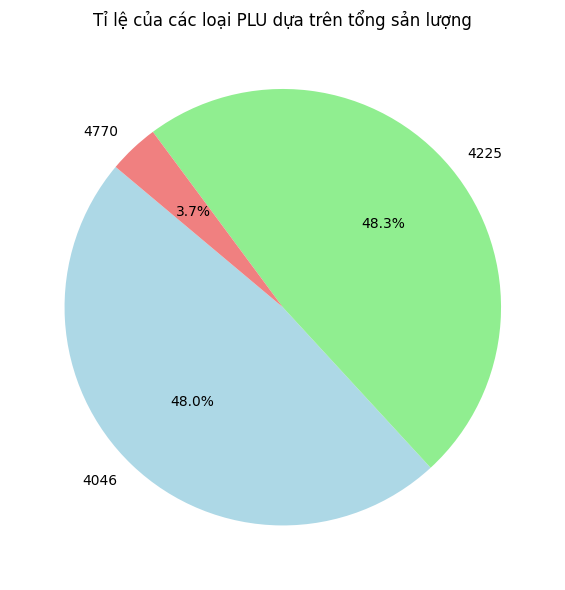

In [134]:
total_sales = df[['4046', '4225', '4770']].sum()
# Plot pie chart for total sales volume
plt.figure(figsize=(8, 6))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Tỉ lệ của các loại PLU dựa trên tổng sản lượng')
plt.tight_layout()
plt.show()

Ta thấy rằng sản phẩm 4046 và 4225 chiếm đa số (48.0% và 48.3%), còn sản phẩm 4770 có sản lượng ít hơn rất nhiều so với hai loại sản phẩm trên. 

Điều này cho thấy PLU 4046 và 4225 là hai sản phẩm chủ lực, chúng chiếm phần lớn thị phần và có mức độ tiêu thụ tương đương nhau. Nguyên nhân dẫn đến sự khác biệt về sản lượng giữa các mã PLU có thể là do sở thích của khách hàng, vì sản phẩm 4770 có kích cỡ lớn hơn hai loại còn lại và khách có xu hướng mua loại vừa và nhỏ hơn.

#### Type

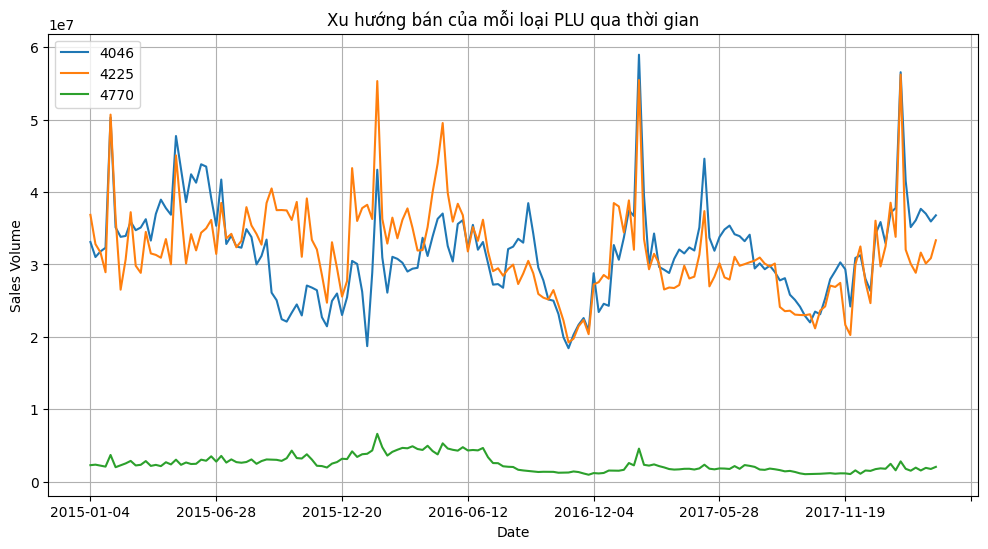

In [135]:
sales_trends = df.groupby('Date')[['4046', '4225', '4770']].sum()

plt.figure(figsize=(12, 6))
for column in sales_trends.columns:
    sales_trends[column].plot(label=column)

plt.title('Xu hướng bán của mỗi loại PLU qua thời gian')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid()
plt.show()

Xem xét qua xu hướng bán của mỗi loại sản phẩm theo thời gian ta thấy xu hướng chung là cả hai mã sản phẩm PLU 4046 và 4225 đều có xu hướng bán hàng tương đối ổn định trong suốt thời gian theo dõi, và có một số biến động theo mùa. Lượng bán hàng của hai mã này thường dao động trong một khoảng nhất định, không có sự tăng trưởng hoặc giảm mạnh. PLU 4770 có lượng bán hàng thấp hơn đáng kể so với hai mã còn lại và có xu hướng giảm dần theo thời gian.

Sản lượng có thể có tương quan nghịch với giá trung bình. Vì quan sát ta thấy rằng vào các thời điểm các loại sản phẩm có sản lượng cao thì giá trung bình có xu hướng giảm ở thời điểm đó. Tương quan nghịch giữa sản lượng và giá sản phẩm có thể dễ dàng lý giải bằng kinh tế học cơ bản, rằng khi giá của một sản phẩm tăng lên, nhu cầu về sản phẩm đó thường giảm đi và ngược lại. Điều này có nghĩa là sản lượng bán ra của sản phẩm sẽ có xu hướng giảm khi giá tăng và tăng khi giá giảm.

#### Total volume

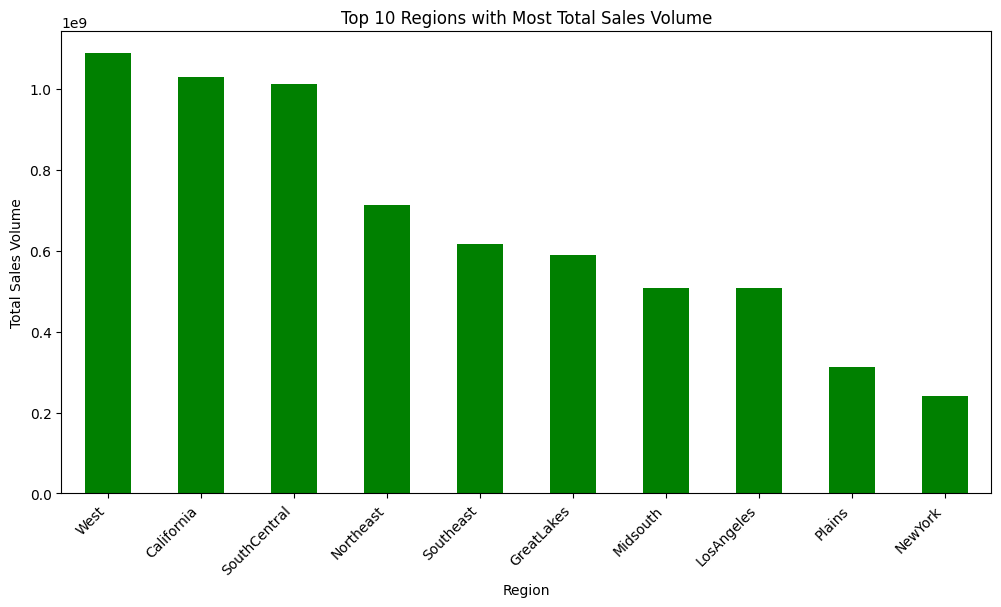

In [136]:
region_sales = df[df['region'] != 'TotalUS'].groupby('region')['Total Volume'].sum()
top_10_regions = region_sales.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_regions.plot(kind='bar', color='green')
plt.title('Top 10 Regions with Most Total Sales Volume')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.show()

Vùng bờ Tây Hoa Kỳ (West) có tổng sản lượng cao nhất. Vùng này bao gồm các tiểu bang California, Oregon và Washington, với California là tiểu bang đông dân nhất Hoa Kỳ.

California cũng đã chiếm phần lớn sản lượng của vùng tây Hoa Kỳ, khi tiểu bang này đứng thứ hai trong tổng sản lượng (bộ dữ liệu này ghi nhận dữ liệu của cả vùng địa lý lẫn tiểu bang cho nên ta thấy rằng dù West đã bao gồm California nhưng bộ dữ liệu vẫn có dữ liệu sản lượng của California). Tiểu bang Los Angeles và New York cũng là những nơi có sản lượng cao nhất.

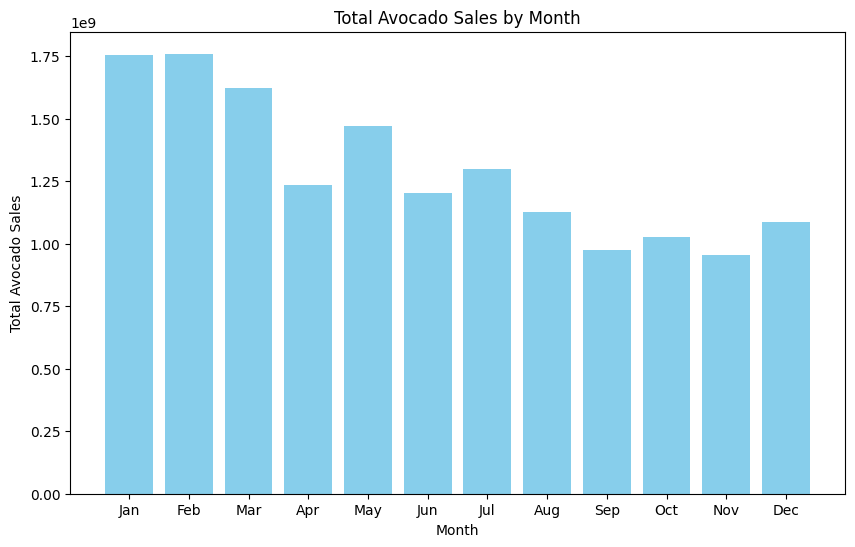

In [137]:
avocado_df = df.copy()
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])
avocado_df['Month'] = avocado_df['Date'].dt.month
monthly_sales = avocado_df.groupby('Month')['Total Volume'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by='Total Volume', ascending=False)
monthly_sales = monthly_sales.sort_values(by='Month')
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Total Volume'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Avocado Sales')
plt.title('Total Avocado Sales by Month')
plt.xticks(monthly_sales['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Biểu đồ trên cho ta thấy doanh số bán bơ theo tháng trong tất cả các năm từ 2015 đến 2017. Doanh số bán hàng cao nhất vào tháng 2, tiếp theo là tháng 1 và 3, điều này cho thấy có một nhu cầu tiêu thụ bơ cao vào đầu năm. Doanh số giảm dần từ tháng 4 đến tháng 9, đạt mức thấp nhất vào khoảng tháng 9. Sau đó, doanh số bắt đầu tăng trở lại vào cuối năm. Dựa vào biểu đồ, có thể rút ra kết luận rằng doanh số có tính mùa vụ rõ rệt. Nhu cầu tiêu thụ bơ cao nhất vào đầu năm và giảm dần trong suốt mùa hè.

### 3.4 Phân tích đặc trưng khu vực

Phân tích khu vực trong dữ liệu chuỗi thời gian là quan trọng giúp chúng ta hiểu rõ hơn về sự khác biệt và tương đồng trong xu hướng, mùa vụ, và các biến động khác nhau giữa các địa điểm hoặc khu vực. Dựa vào thuộc tính Region của dữ liệu, ta có thể so sánh giá bơ giữa các khu vực với nhau:

In [138]:
top_5_avg_price = df.groupby('region')['AveragePrice'].mean().reset_index()
top_5_avg_price = top_5_avg_price.sort_values('AveragePrice', ascending=False)
cheapest_avg_price = top_5_avg_price.tail(1).reset_index()
avg_US_price = top_5_avg_price[top_5_avg_price.region == 'TotalUS'][[
    'region', 'AveragePrice']]
top_5_avg_price = top_5_avg_price.head()
combined_avg_price = pd.concat(
    [top_5_avg_price, avg_US_price, cheapest_avg_price])
combined_avg_price = combined_avg_price.reset_index(drop=True)
combined_avg_price = combined_avg_price.drop('index', axis=1)

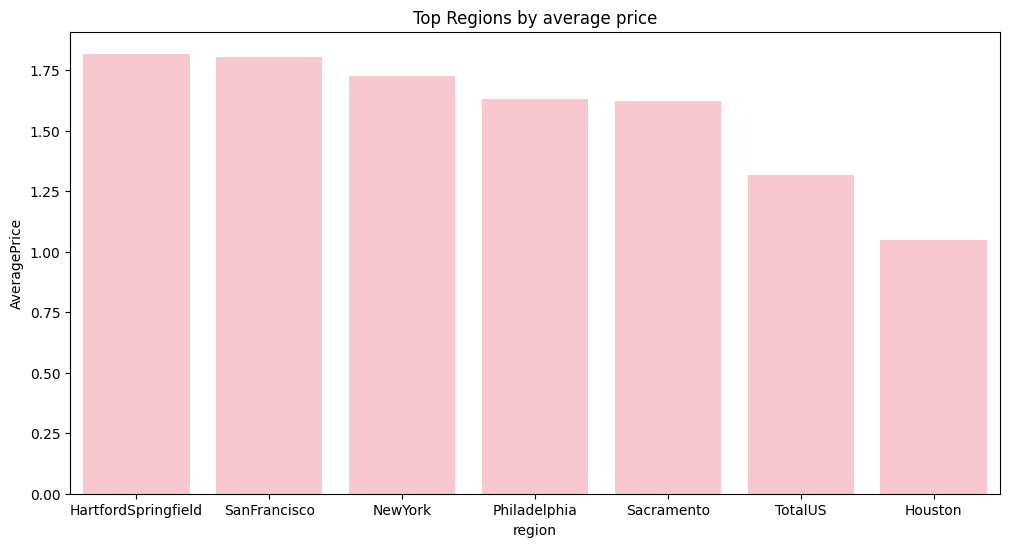

In [139]:
plt.figure(figsize=(12,6))
sns.barplot(data=combined_avg_price, x='region', y='AveragePrice', color='pink')
plt.title('Top Regions by average price')
plt.show()

Các vùng Hartford–Springfield, San Francisco, New York, Philadenphia và Sacramento có giá bơ trung bình cao hơn so với các vùng còn lại. So với nơi có giá bơ thấp nhất là Houston thì có sự chênh lệch khá lớn. Điều này có thể là do những nơi này là những thành phố lớn và có mật độ dân cư cao và có chi phí sinh hoạt cao hơn. Các thành phố lớn thường nằm xa các vùng trồng bơ chính, có khả năng dẫn đến chi phí vận chuyển tăng cao.

### 3.5 Phân tích đặc trưng doanh thu

In [140]:
df['Income'] = df['Total Volume']*df['AveragePrice']

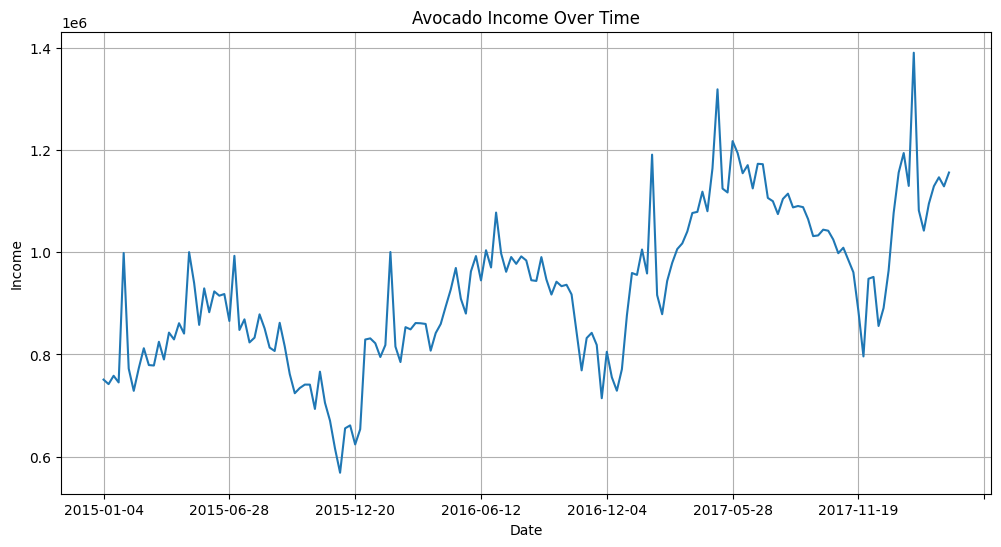

In [141]:
avg_income = df.groupby('Date')['Income'].mean().reset_index()
avg_income.set_index('Date',inplace = True)
plt.figure(figsize=(12,6))
avg_income['Income'].plot()
plt.title('Avocado Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.grid()
plt.show()

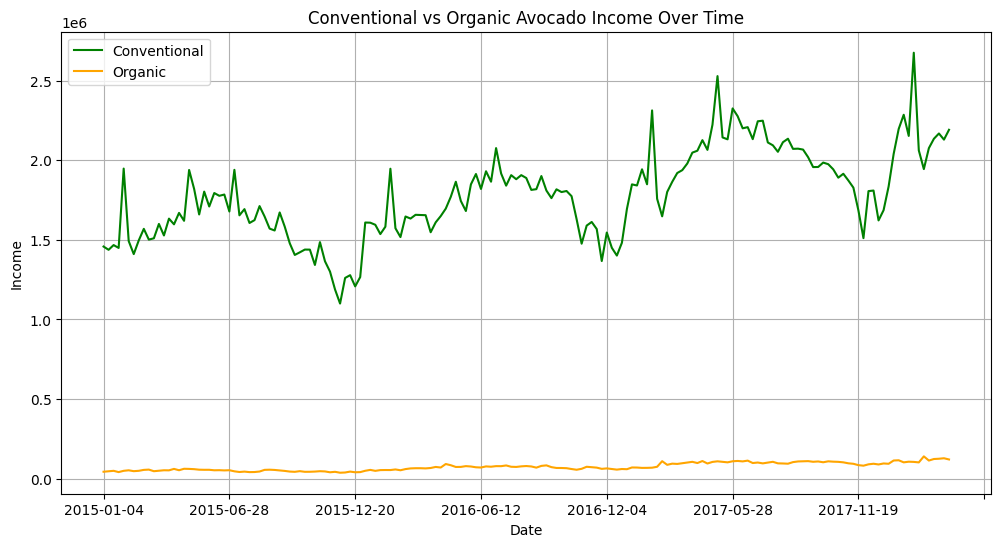

In [142]:
conv_income = df[df['type'] == 'conventional'].groupby('Date')['Income'].mean().reset_index()
conv_income.set_index('Date',inplace = True)
org_income = df[df['type'] == 'organic'].groupby('Date')['Income'].mean().reset_index()
org_income.set_index('Date',inplace = True)

plt.figure(figsize=(12, 6))
conv_income['Income'].plot(label='Conventional', color='green')
org_income['Income'].plot(label='Organic', color='orange')
plt.title('Conventional vs Organic Avocado Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.legend()
plt.grid()
plt.show()

<Axes: >

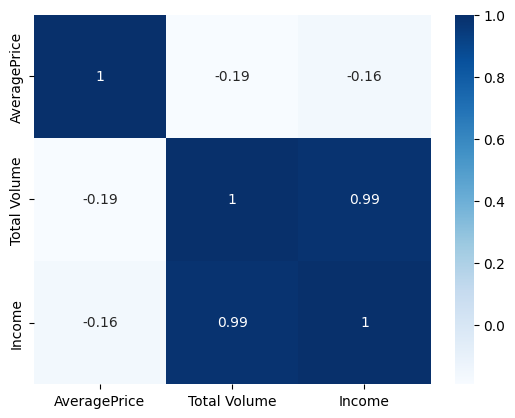

In [143]:
corr = df[['AveragePrice', 'Total Volume', 'Income']].corr(method = 'pearson')
sns.heatmap(corr, annot=True, cmap='Blues')

### 3.6 Biểu đồ Choropleth maps

In [144]:
regions = {
    'Albany': ['NY'],
    'Atlanta': ['GA'],
    'BaltimoreWashington': ['MD', 'DC'],
    'Boise': ['ID'],
    'Boston': ['MA'],
    'BuffaloRochester': ['NY'],
    'California': ['CA'],
    'Charlotte': ['NC'],
    'Chicago': ['IL'],
    'CincinnatiDayton': ['OH'],
    'Columbus': ['OH'],
    'DallasFtWorth': ['TX'],
    'Denver': ['CO'],
    'Detroit': ['MI'],
    'GrandRapids': ['MI'],
    'GreatLakes': ['IL', 'IN', 'MI', 'OH', 'PA'],
    'HarrisburgScranton': ['PA'],
    'HartfordSpringfield': ['CT', 'MA'],
    'Houston': ['TX'],
    'Indianapolis': ['IN'],
    'Jacksonville': ['FL'],
    'LasVegas': ['NV'],
    'LosAngeles': ['CA'],
    'Louisville': ['KY'],
    'MiamiFtLauderdale': ['FL'],
    'Midsouth': ['TN', 'AR', 'MS'],
    'Nashville': ['TN'],
    'NewOrleansMobile': ['LA', 'AL'],
    'NewYork': ['NY'],
    'Northeast': ['CT', 'MA', 'NH', 'NY', 'RI', 'VT'],
    'NorthernNewEngland': ['ME', 'NH', 'VT'],
    'Orlando': ['FL'],
    'Philadelphia': ['PA'],
    'PhoenixTucson': ['AZ'],
    'Pittsburgh': ['PA'],
    'Plains': ['KS', 'OK'],
    'Portland': ['OR'],
    'RaleighGreensboro': ['NC'],
    'RichmondNorfolk': ['VA'],
    'Roanoke': ['VA'],
    'Sacramento': ['CA'],
    'SanDiego': ['CA'],
    'SanFrancisco': ['CA'],
    'Seattle': ['WA'],
    'SouthCarolina': ['SC'],
    'SouthCentral': ['TX', 'OK', 'AR'],
    'Southeast': ['AL', 'FL', 'GA', 'SC'],
    'Spokane': ['WA'],
    'StLouis': ['MO'],
    'Syracuse': ['NY'],
    'Tampa': ['FL'],
    'West': ['CA', 'WA', 'OR'],
    'WestTexNewMexico': ['TX', 'NM']
}
states_price = dict()
states_volume = dict()
states_income = dict()

for i in regions:
    avg_price = df[(df.region == i) & (df.year == 2017)]['AveragePrice'].mean()
    total_volume = df[(df.region == i) & (df.year == 2017)]['Total Volume'].mean()
    income = df[(df.region == i) & (df.year == 2017)]['Income'].mean()
    
    for state in regions.get(i):
        if states_price.get(state):
            states_price[state] = (avg_price + states_price[state]) / 2
        else:
            states_price[state] = avg_price
        if states_volume.get(state):
            states_volume[state] = (total_volume + states_volume[state]) / 2
        else:
            states_volume[state] = total_volume
        if states_income.get(state):
            states_income[state] = (income + states_income[state]) / 2
        else:
            states_income[state] = income

locations = list(states_price.keys())
state_avg_price = list(states_price.values())
state_avg_volume = list(states_volume.values())
state_avg_income = list(states_income.values())

In [193]:
import plotly.express as px

fig = px.choropleth(locations=locations, locationmode="USA-states", color=state_avg_price, scope="usa", color_continuous_scale='ylgn', 
                    title='Avocado average price by states in 2017',
                    labels={'color':'average price'})
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25}, width=1000, height=500)
fig.show()

In [201]:
fig = px.choropleth(locations=locations, locationmode="USA-states", color=state_avg_volume, scope="usa", color_continuous_scale='blues', 
                    title='Avocado average volume by states in 2017',
                    labels={'color':'average volume'})
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25}, width=1000, height=500)
fig.show()

In [200]:
fig = px.choropleth(locations=locations, locationmode="USA-states", color=state_avg_income, scope="usa", color_continuous_scale='tempo', 
                    title='Avocado average income by states in 2017',
                    labels={'color':'average income'})
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25}, width=1000, height=500)
fig.show()

## 4 Phân tích chuỗi thời gian

### 4.3 Phân rã chuỗi thời gian

Dữ liệu chuỗi thời gian có một số đặc điểm phân biệt nó với các loại dữ liệu khác:

- Xu hướng (Trend): Đây là sự di chuyển hoặc hướng đi dài hạn trong dữ liệu. Ví dụ, sự gia tăng chung trong doanh số bán hàng của một công ty qua nhiều năm.

- Tính mùa vụ (Seasonality): Đây là các tính lặp lại theo khoảng thời gian cố định, thành phần chỉ ra các xu hướng theo mùa, theo tháng, theo quý chẳng hạn như doanh số bán bơ thường tăng cao hơn vào đầu năm và giảm dần ở giữa năm.

- Mô hình chu kỳ (Cyclic Patterns): Khác với tính thời vụ, các mô hình chu kỳ không có chu kỳ cố định, nó có sự vận động trong khoảng thời gian dài hơn (nhiều năm). Chúng có thể bị ảnh hưởng bởi các chu kỳ kinh tế hoặc các yếu tố khác.

- Thành phần bất thường (Irregular Components): Hay còn gọi là nhiễu trắng (white noise) đây là các biến đổi ngẫu nhiên hoặc không thể dự đoán trong dữ liệu, nó chỉ ra sự bất thường của các điểm dữ liệu.

Để có thể hiểu được dữ liệu dạng chuỗi thời gian, ta có thể phân tách dữ liệu thành các thành phần đơn giản hơn, rồi từ đó có thể đi sâu vào phân tích xu hướng hay khuôn mẫu của các thành phần. Quá trình này gọi là phân rã chuỗi thời gian (Decomposition).

In [148]:
df_resample = df.copy(deep=True)
df_resample['Date'] = pd.to_datetime(df_resample['Date'])
df_resample.set_index('Date', inplace=True)
df_resample = df_resample.resample('W').agg({'AveragePrice': 'mean', 'Total Volume': 'sum', '4046': 'sum', '4225': 'sum',
                                             '4770': 'sum', 'Total Bags': 'sum', 'Small Bags': 'sum', 'Large Bags': 'sum', 'XLarge Bags': 'sum'})
df_resample

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Date,,,,,,,,,
2015-01-04,1.301296,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59
2015-01-11,1.370648,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54
2015-01-18,1.391111,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50
2015-01-25,1.397130,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10
2015-02-01,1.247037,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46
...,...,...,...,...,...,...,...,...,...
2018-02-25,1.359630,1.092314e+08,36101449.62,28851825.03,1937291.35,42338670.14,30234652.79,11314895.65,789121.70
2018-03-04,1.350185,1.118449e+08,37680590.60,31640490.62,1546057.53,40975831.43,30843878.06,9433824.95,698128.42
2018-03-11,1.335093,1.114652e+08,37014593.28,30127345.96,1906686.20,42415959.60,32760303.59,8948685.56,706970.45


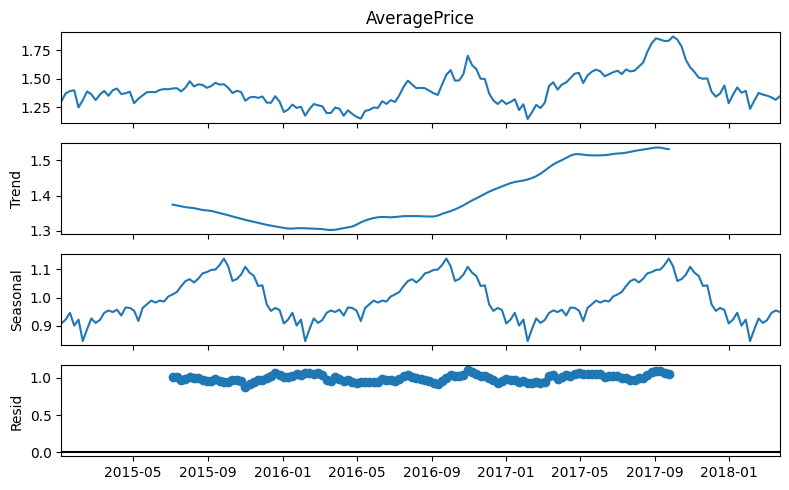

In [149]:
import statsmodels.api as sm
fig = sm.tsa.seasonal_decompose(df_resample['AveragePrice'], model = 'multiplicative').plot()
fig.set_size_inches((8, 5))
fig.tight_layout()
plt.show()

### 4.2 Kiểm tra tính dừng

In [150]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    plt.figure(figsize=(15, 5))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
                         'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

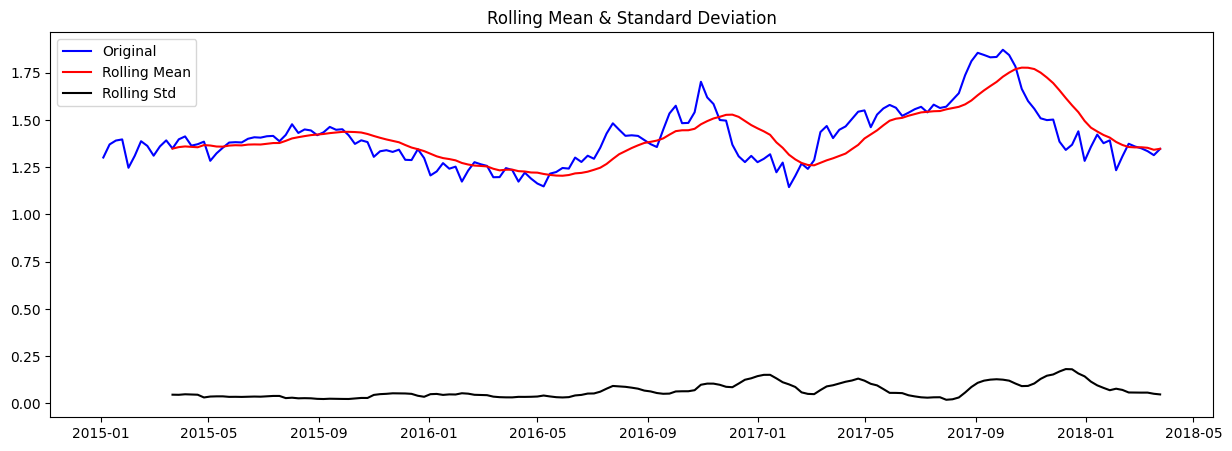

Results of Dickey-Fuller Test:
Test Statistic                  -2.357817
p-value                          0.153998
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [151]:
test_stationarity(df_resample['AveragePrice'])

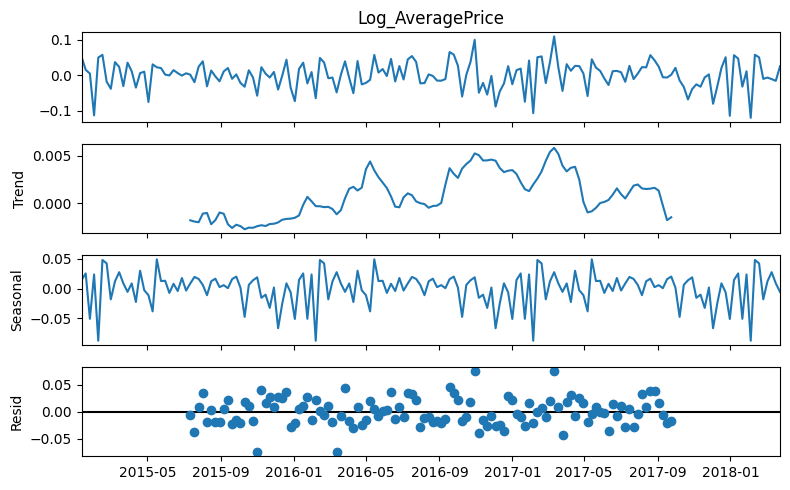

In [152]:
df_resample['Log_AveragePrice'] = np.log(df_resample['AveragePrice'])
df_resample_log_diff = df_resample['Log_AveragePrice'].diff()
df_resample_log_diff = df_resample_log_diff.dropna()

fig = sm.tsa.seasonal_decompose(df_resample_log_diff,period = 52).plot()
fig.set_size_inches((8, 5))
fig.tight_layout()
plt.show()

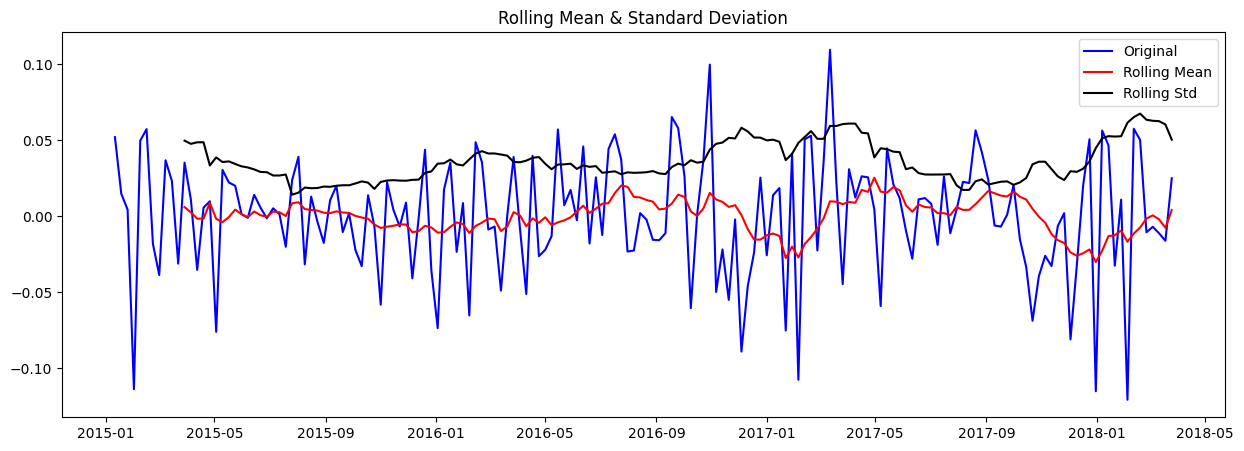

Results of Dickey-Fuller Test:
Test Statistic                -1.381916e+01
p-value                        7.964466e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


In [153]:
test_stationarity(df_resample_log_diff)

## 5 Huấn luyện mô hình

In [154]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
    plt.show()



### 5.1 ARIMA

#### 5.1.1 Modeling

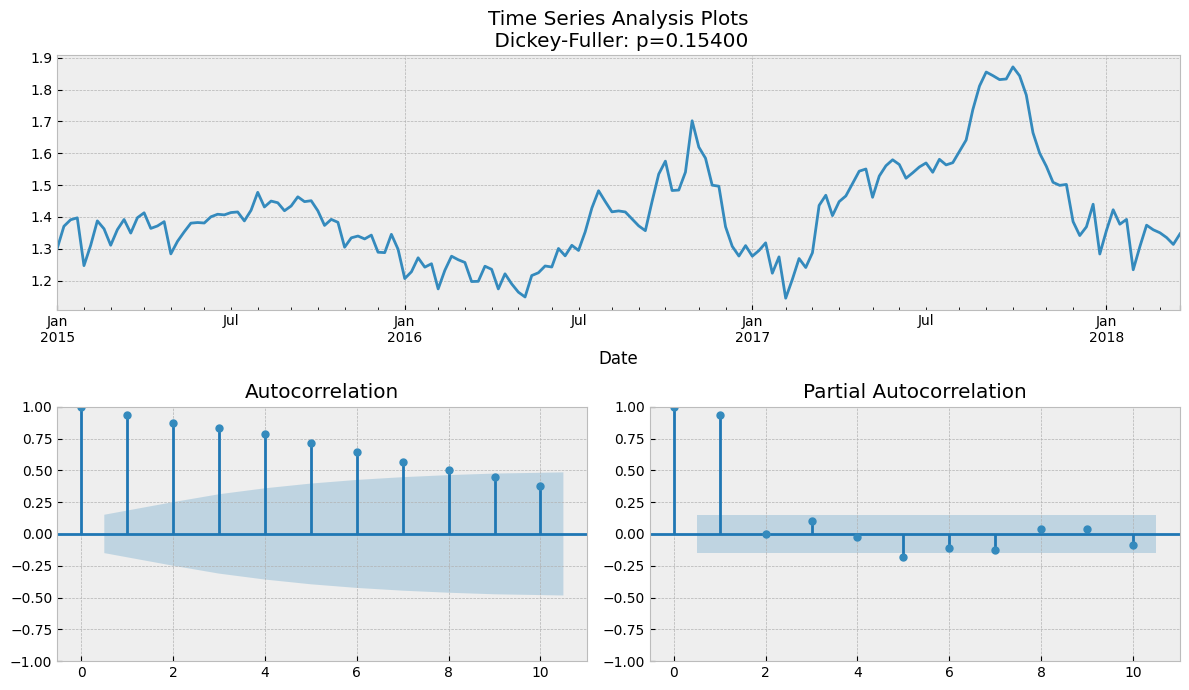

In [155]:
tsplot(df_resample['AveragePrice'],lags = 10)

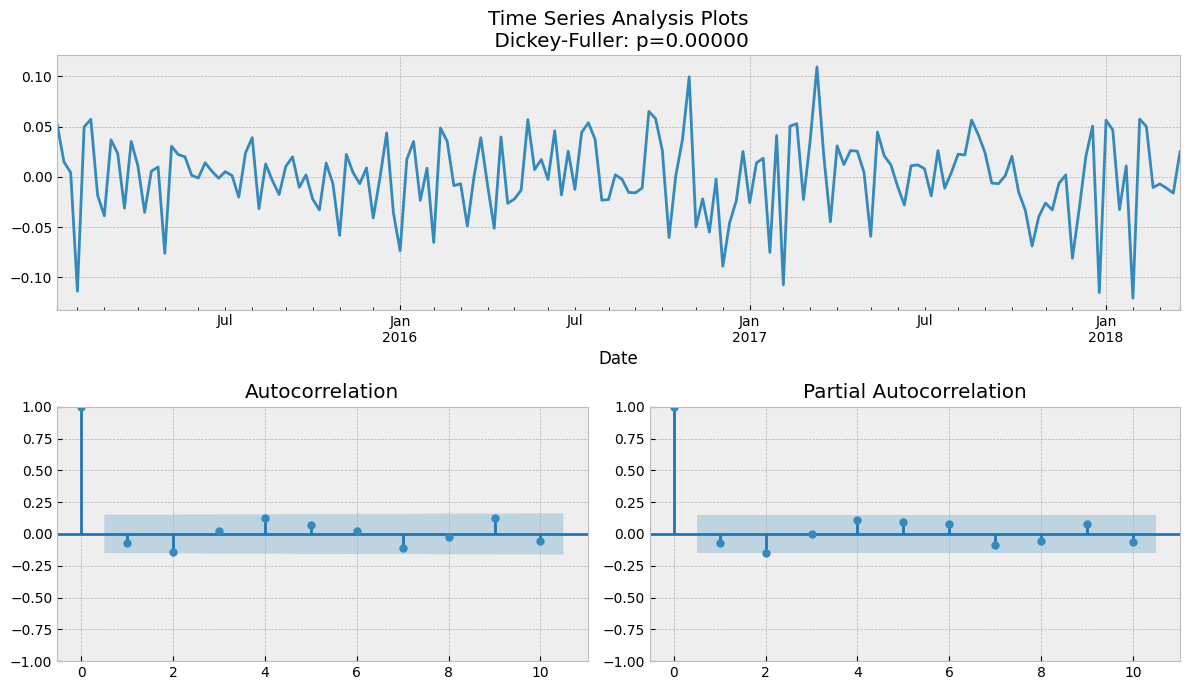

In [156]:
tsplot(df_resample_log_diff,lags = 10)

Ta chọn ra các thành phần của ARIMA model:

- p = 1, dựa vào partial autocorrelation, tìm lag đầu tiên giảm xuống 0 mà không ảnh hưởng bởi lag trước đó.

- d = 1, số lần thực hiện sai phân, ở mục 4.3 ta đã lấy sai phân một lần.

- q = 2, do ACF và PACF đều có các giá trị đáng kể ở lag 1 và 2.

In [157]:
# from statsmodels.tsa.arima_model import ARIMA as ARIMA
model = sm.tsa.arima.ARIMA(df_resample['Log_AveragePrice'],order = (1,1,2))
arima_model = model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:       Log_AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 309.315
Date:                Thu, 27 Mar 2025   AIC                           -610.631
Time:                        14:48:46   BIC                           -598.135
Sample:                    01-04-2015   HQIC                          -605.559
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1536      0.789     -0.195      0.846      -1.700       1.393
ma.L1          0.0782      0.780      0.100      0.920      -1.450       1.606
ma.L2         -0.1236      0.098     -1.256      0.2

#### 5.1.2 Forecasting

##### In-sample

In [158]:
size = int(len(df_resample) - 30)
train, test = df_resample['Log_AveragePrice'][0:size], df_resample['Log_AveragePrice'][size:len(
    df_resample)]
print('\t ARIMA MODEL : In - Sample Forecasting \n')
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(1, 1, 2))
    arima_model = model.fit()
    output = arima_model.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

	 ARIMA MODEL : In - Sample Forecasting 

predicted = 1.791331, expected = 1.855185
predicted = 1.841266, expected = 1.843889
predicted = 1.836749, expected = 1.831389
predicted = 1.831610, expected = 1.833333
predicted = 1.833854, expected = 1.871296
predicted = 1.868752, expected = 1.843333
predicted = 1.840565, expected = 1.782870
predicted = 1.789364, expected = 1.664537
predicted = 1.676536, expected = 1.600185
predicted = 1.615299, expected = 1.559074
predicted = 1.567359, expected = 1.508796
predicted = 1.514397, expected = 1.499167
predicted = 1.504528, expected = 1.502130
predicted = 1.503498, expected = 1.385370
predicted = 1.386997, expected = 1.341481
predicted = 1.351253, expected = 1.368981
predicted = 1.372485, expected = 1.439907
predicted = 1.438179, expected = 1.283519
predicted = 1.281181, expected = 1.357778
predicted = 1.367572, expected = 1.422593
predicted = 1.410333, expected = 1.377130
predicted = 1.374604, expected = 1.392222
predicted = 1.395309, expected = 1

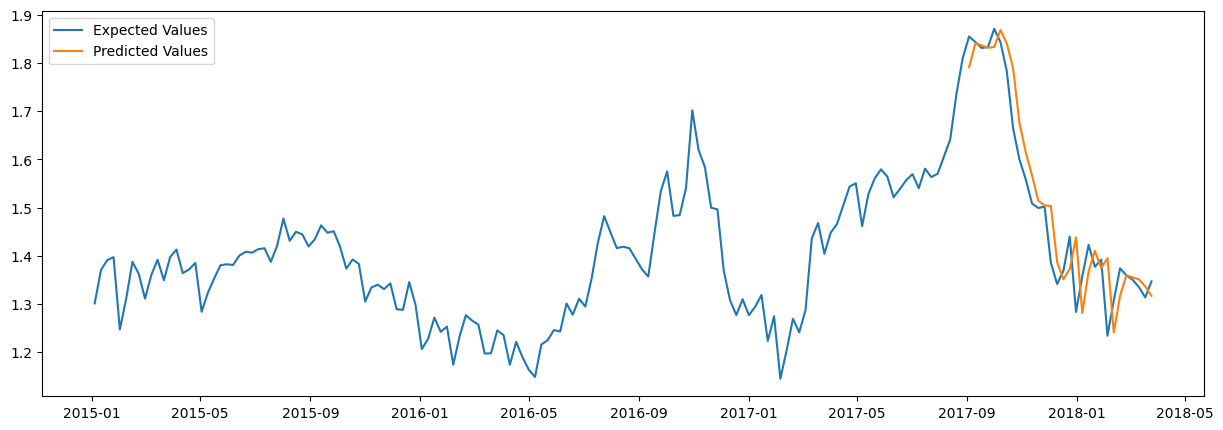

In [159]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df_resample['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [160]:
error = np.sqrt(mean_squared_error(np.exp(test),np.exp(predictions)))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

Test RMSE: 0.0654


##### Out-of-sample

In [161]:
df_resample_price = df_resample[['AveragePrice', 'Log_AveragePrice']]
df_resample_price

,AveragePrice,Log_AveragePrice
Date,,
2015-01-04,1.301296,0.263361
2015-01-11,1.370648,0.315284
2015-01-18,1.391111,0.330103
2015-01-25,1.397130,0.334420
2015-02-01,1.247037,0.220770
...,...,...
2018-02-25,1.359630,0.307212
2018-03-04,1.350185,0.300242
2018-03-11,1.335093,0.289001


In [162]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_resample_price.index[-1] + DateOffset(weeks = x) for x in range(0,52)]

# New dataframe for storing the future values
df2 = pd.DataFrame(index = future_dates[1:],columns = df_resample_price.columns)

forecast = pd.concat([df_resample_price, df2])
forecast['ARIMA_Forecast'] = np.NaN
forecast.head()

,AveragePrice,Log_AveragePrice,ARIMA_Forecast
2015-01-04,1.301296,0.263361,NaN
2015-01-11,1.370648,0.315284,NaN
2015-01-18,1.391111,0.330103,NaN
2015-01-25,1.397130,0.334420,NaN
2015-02-01,1.247037,0.220770,NaN


In [163]:
f1 = np.array(np.exp(arima_model.forecast(steps = 51)))

for i in range(len(f1)):
    forecast.iloc[169 + i,2] = f1[i]
forecast.tail()

,AveragePrice,Log_AveragePrice,ARIMA_Forecast
2019-02-17,NaN,NaN,1.319066
2019-02-24,NaN,NaN,1.319066
2019-03-03,NaN,NaN,1.319066
2019-03-10,NaN,NaN,1.319066
2019-03-17,NaN,NaN,1.319066


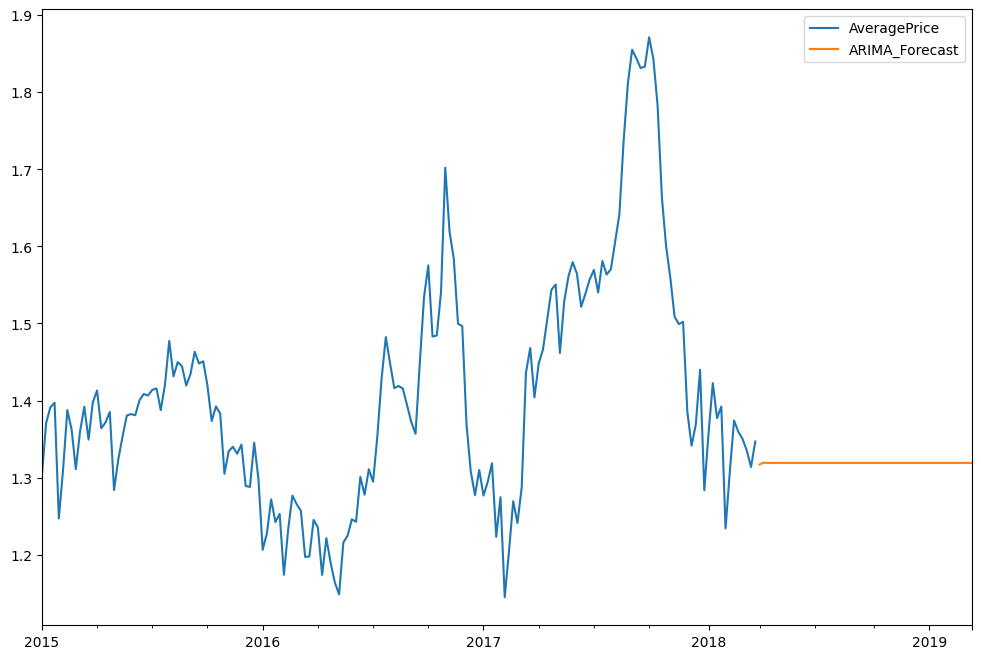

In [164]:
forecast[['AveragePrice','ARIMA_Forecast']].plot(figsize = (12,8));

### 5.2 SARIMA

#### 5.2.1 Modeling

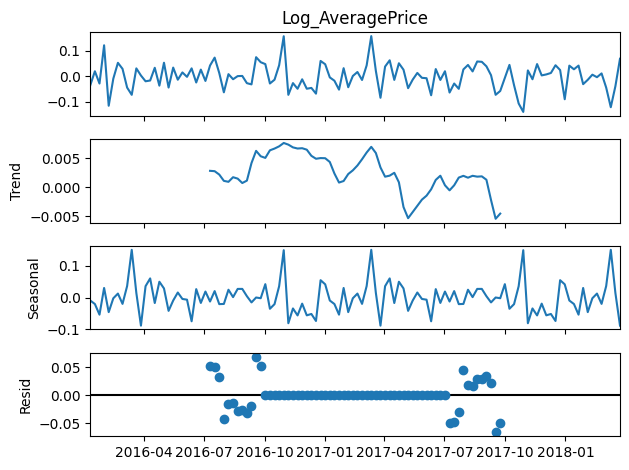

In [165]:
df_resample_log_diff_seas = df_resample_log_diff.diff(52)
df_resample_log_diff_seas = df_resample_log_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(df_resample_log_diff_seas).plot()
plt.show()

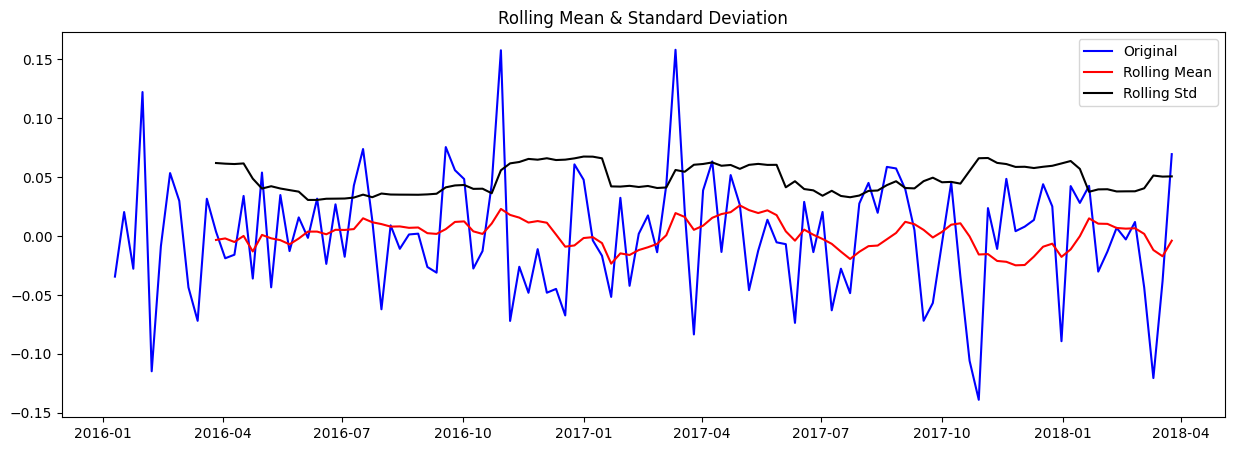

Results of Dickey-Fuller Test:
Test Statistic                  -4.574494
p-value                          0.000144
#Lags Used                      11.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [166]:
test_stationarity(df_resample_log_diff_seas)

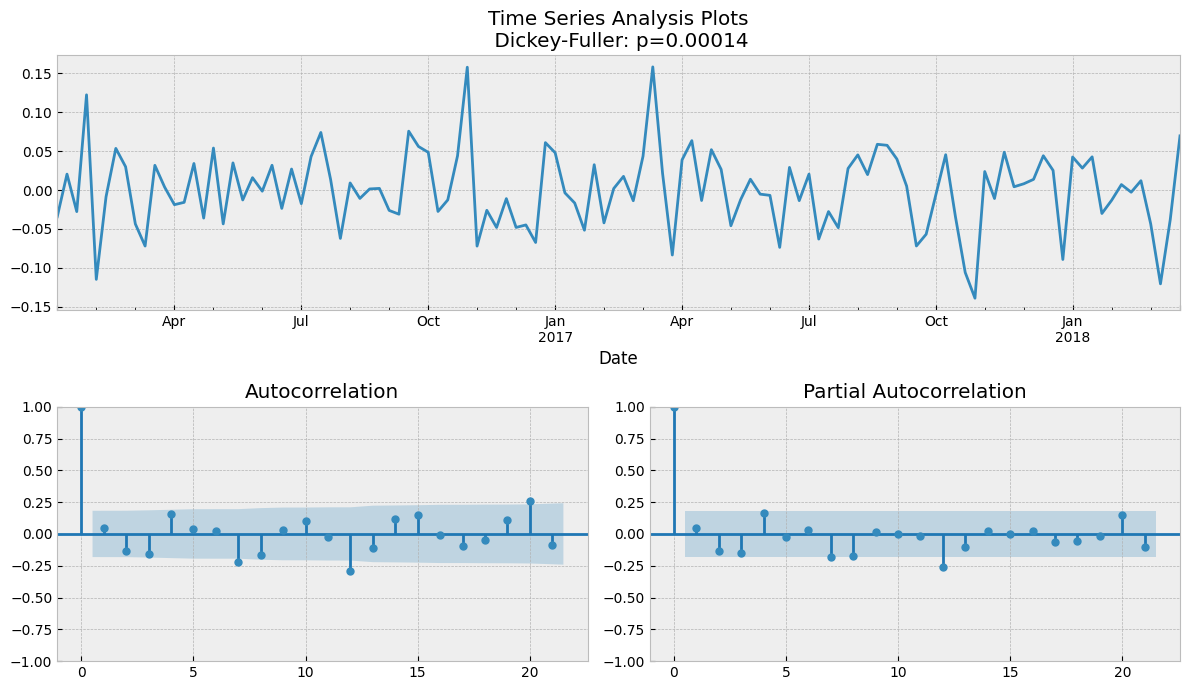

In [167]:
tsplot(df_resample_log_diff_seas)

Đối với các tham số (p,d,q) ta sẽ chọn lại các tham số của ARIMA, với (P,D,Q,M) cách chọn tương tự với ARIMA, ta có:

- P = 0

- D = 1

- Q = 0

- M = 52

In [168]:
model = sm.tsa.statespace.SARIMAX(
    df_resample['Log_AveragePrice'], order=(1, 1, 2), seasonal_order=(0, 1, 0, 52))
sarima_model = model.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                    Log_AveragePrice   No. Observations:                  169
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 52)   Log Likelihood                 184.890
Date:                             Thu, 27 Mar 2025   AIC                           -361.779
Time:                                     14:48:54   BIC                           -350.765
Sample:                                 01-04-2015   HQIC                          -357.308
                                      - 03-25-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7812      0.167      4.680      0.000       0.454       1.108
ma.L1         -0.7576      

#### 5.2.2 Forecasting

##### In-sample

In [169]:
size = int(len(df_resample) - 30)
train, test = df_resample['Log_AveragePrice'][0:size], df_resample['Log_AveragePrice'][size:len(
    df_resample)]
print('\t SARIMA MODEL : In - Sample Forecasting \n')
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(
        history, order=(1, 1, 2), seasonal_order=(0, 1, 0, 52))
    sarima_model = model.fit(disp=0)
    output = sarima_model.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

	 SARIMA MODEL : In - Sample Forecasting 

predicted = 1.760839, expected = 1.855185
predicted = 1.815748, expected = 1.843889
predicted = 1.954110, expected = 1.831389
predicted = 1.922169, expected = 1.833333
predicted = 1.877496, expected = 1.871296
predicted = 1.765302, expected = 1.843333
predicted = 1.845840, expected = 1.782870
predicted = 1.847098, expected = 1.664537
predicted = 1.846475, expected = 1.600185
predicted = 1.532948, expected = 1.559074
predicted = 1.564911, expected = 1.508796
predicted = 1.450306, expected = 1.499167
predicted = 1.523822, expected = 1.502130
predicted = 1.389803, expected = 1.385370
predicted = 1.337151, expected = 1.341481
predicted = 1.322277, expected = 1.368981
predicted = 1.415474, expected = 1.439907
predicted = 1.406950, expected = 1.283519
predicted = 1.299212, expected = 1.357778
predicted = 1.396739, expected = 1.422593
predicted = 1.324639, expected = 1.377130
predicted = 1.436510, expected = 1.392222
predicted = 1.245638, expected = 

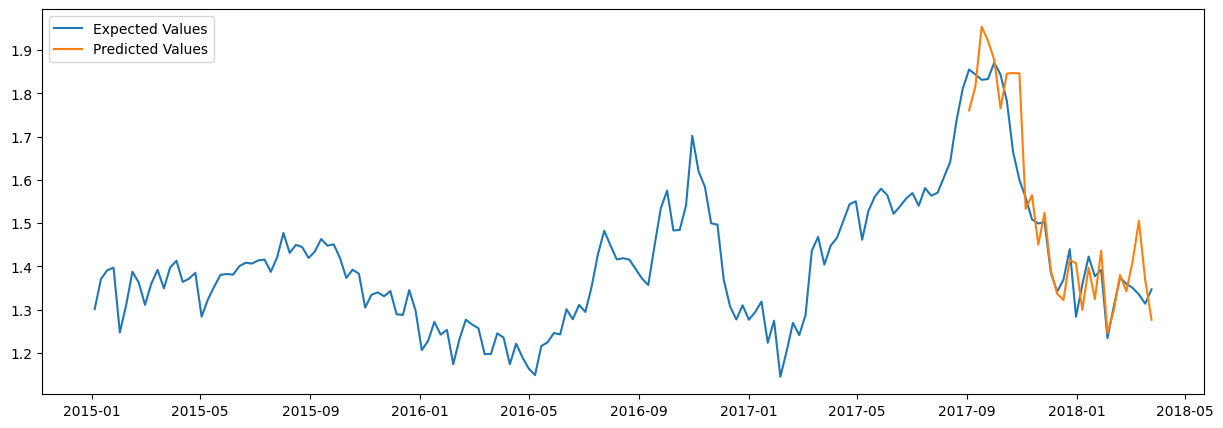

In [170]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df_resample['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [171]:
error = np.sqrt(mean_squared_error(np.exp(test),np.exp(predictions)))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

Test RMSE: 0.0840


##### Out-of-sample

In [172]:
df_resample_price = df_resample[['AveragePrice', 'Log_AveragePrice']]
df_resample_price

,AveragePrice,Log_AveragePrice
Date,,
2015-01-04,1.301296,0.263361
2015-01-11,1.370648,0.315284
2015-01-18,1.391111,0.330103
2015-01-25,1.397130,0.334420
2015-02-01,1.247037,0.220770
...,...,...
2018-02-25,1.359630,0.307212
2018-03-04,1.350185,0.300242
2018-03-11,1.335093,0.289001


In [173]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_resample_price.index[-1] + DateOffset(weeks = x) for x in range(0,52)]

# New dataframe for storing the future values
df2 = pd.DataFrame(index = future_dates[1:],columns = df_resample_price.columns)

forecast = pd.concat([df_resample_price, df2])
forecast['SARIMA_Forecast'] = np.NaN
forecast.head()

,AveragePrice,Log_AveragePrice,SARIMA_Forecast
2015-01-04,1.301296,0.263361,NaN
2015-01-11,1.370648,0.315284,NaN
2015-01-18,1.391111,0.330103,NaN
2015-01-25,1.397130,0.334420,NaN
2015-02-01,1.247037,0.220770,NaN


In [174]:
f3 = np.array(np.exp(sarima_model.forecast(steps = 51)))

for i in range(len(f3)):
    forecast.iloc[169 + i,2] = f3[i]
forecast

,AveragePrice,Log_AveragePrice,SARIMA_Forecast
2015-01-04,1.301296,0.263361,NaN
2015-01-11,1.370648,0.315284,NaN
2015-01-18,1.391111,0.330103,NaN
2015-01-25,1.397130,0.334420,NaN
2015-02-01,1.247037,0.220770,NaN
...,...,...,...
2019-02-17,NaN,NaN,1.300529
2019-02-24,NaN,NaN,1.367233
2019-03-03,NaN,NaN,1.352861
2019-03-10,NaN,NaN,1.343465


<Axes: >

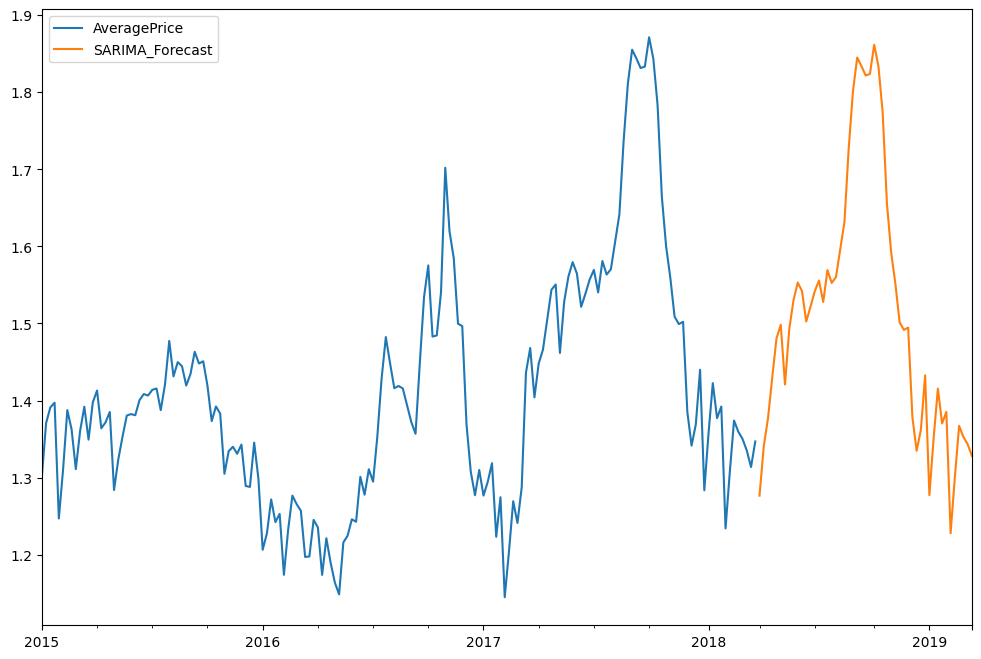

In [175]:
forecast[['AveragePrice', 'SARIMA_Forecast']].plot(figsize=(12, 8))